## CS339: Artificial Intelligence
# Project 1: K-Nearest Neighbor Algorithm

The purpose of this project is to implement the K-Nearest Neighbors Algorithm from scratch (without using built-in KNN fuctions) in Python. 
KNN classifies data points based on the distance between the new data points and the earlier stored data points. The algorithm finds the similarity measure (i.e. distance) between a new point and all available points in the data, selecting the specific points closest (neighbors) to the new point, then voting for the most common label of the points nearby (for classification) or averages the labels (for regression). 

For the purposes of this project, we will particularly focus on the Fisher’s Iris data set to show our algorithm. The Iris dataset has fifty records on the length and width measurements for sepals and petals for each of the three Iris species: Iris setosa, Iris virginica, and Iris versicolor. Our data is stored in a .csv file; here is a sample of what it looks like before we start with the KNN algorithm:

5.1,3.5,1.4,0.2,Iris-setosa

4.9,3.0,1.4,0.2,Iris-setosa

4.7,3.2,1.3,0.2,Iris-setosa

4.6,3.1,1.5,0.2,Iris-setosa

5.0,3.6,1.4,0.2,Iris-setosa

We start by first importing the necessary libraries and then head onto first 'cleaning up our data'. The main function handles the reformating of the data first.

The function handles the Iris dataset by first reading in the data from the .csv file. To be able to use the data for calculations, we first convert all the string values to float values. Further, the algorithm depends on having numeral values to be able to calculate the distances and classify data points efficiently which is why we need to make the data so that is it not categorical. With respect to the Iris data set, we can pivot species into indicator variables, marking true as 1 and false as 0. So respectively, the data is replaced for categorical values as shown:

Iris-virginica = 0

Iris-setosa = 1

Iris-versicolor = 2

In [52]:
"""
This function formats the data by first reading it in
and then converting strings to integers and the categorical 
values to numerical values. 
Parameters: None
Return value: Formatted data 
"""
def dataformatting():
    f = 'iris.csv'
    data = list()
    with open(f, 'r') as inputf:
        read = reader(inputf)
        for x in read:
            data.append(x)
    for i in range(len(data[0])-1):
        for x in data:
            x[i] = float(x[i].strip())
    y = len(data[0])-1
    z = [x[y] for x in data]
    seta = set(z)
    dic = dict()
    for i, v in enumerate(seta):
        dic[v] = i
    for x in data:
        x[y] = dic[x[y]]
    return data

Similarly, the goal of the normalization function is to change the values of numeric columns in the data to a common scale, without distorting differences in values. For this algorithm, we normalize the data to bring all the variables to the same range of 0-1. This is achieved via first finding the minimun and maximum values of each column and then using the basic normalization formula: x normalized = (x – x minimum) / (x maximum – x minimum)

In [53]:
"""
This function normalizes the data by rescaling it into 
the range of 0 to 1.
Parameters:
    data = formatted Iris data
Return value: none
"""
def normalization(data):
    xtremes = list()
    for i in range(len(data[0])):
        y = [x[i] for x in data]
        maxV = max(y)
        minV = min(y)
        xtremes.append([minV, maxV])
    for x in data:
        for i in range(len(x)):
            l = x[i] - xtremes[i][0]
            m = xtremes[i][1] - xtremes[i][0]
            x[i] = l / m

Now that our dataset has been modified for easy comparison and to recieve the most optimal results, we start our KNN algorithm by first finding the distance between points by using two rows in the data. The smaller the value in the data, the closer the two points are; 0 meaning no distance. The distance between two points is the measure of the straight line in between them which is implemented by this formula we use (in math) to find the distance between two points on a graph (x,y): sqrt(total of i to N (point1[i] – point2[i])^2)

In [54]:
"""
This function calculates the distance 
between two points.
Parameters: 
    x = sample 1
    y = sample 2
Return value: 
    square root of the distance being calculated
"""
def distance(x, y):
    d = 0.0
    for i in range(len(x)-1):
        c = (x[i] - y[i])**2
        d = d + c
    return sqrt(d)

Now steping into actually implementing the algorithm, we first focus on finding the neighbors to the test point. Neighbors are number of closest distances to the point which are defined by the variable 'n_ngb' in our function. The neighbors for each sample are calculated by measuring the distances between the test data and the existing data. We do this by using our distance(x,y) function. Track of distances for each sample is kept in a tuple which is sorted in a descending order of distances. After the neighbors for the samples are appended to a list, the max function uses the the list to get what class has more values and then makes a prediction for our testing data. 

In [55]:
"""
This function implements the K-Nearest Neighbors 
Algorithm for a single sample.
Parameters: 
    training = training data set 
    testing = testing data set
    ngb_size = number of neighbors 
Return value: 
    res = predicted classification for the sample
"""
def k_nearest_neighbors_1(training, testing, ngb_size):
    dist = list()
    for y in training:
        dis = distance(testing, y)
        dist.append((y, dis))
    dist.sort(key=lambda tup: tup[1])
    ngb = list()
    for i in range(ngb_size):
        ngb.append(dist[i][0])
    v = [testing[-1] for testing in ngb]
    res = max(set(v), key=v.count)
    return res

To better understand the performance of KNN, we will first run our model on a sample S. Sample S was picked out randomly from the data by me. In this scenerio, we run the algorithm to see if the prediction made for our sample is correct or not. 

S = 6.4,3.1,5.5,1.8,Iris-virginica

As seen in the data, the classification of sample S is Iris-virginica. When running the KNN algorithm on S, we see that the algorithm correctly classifies S as 0 which is Iris-virginica.

In [67]:
"""
This function calls the K-Nearest Neighbors 
Algorithm for a single sample and prints out 
accuracy percentage and mean values of each K-fold.
Parameters: None
Return value: None
"""

def main1():
    f = 'iris.csv'
    data = list()
    with open(f, 'r') as inputf:
        read = reader(inputf)
        for x in read:
            data.append(x)
    for i in range(len(data[0])-1):
        for x in data:
            x[i] = float(x[i].strip())
    y = len(data[0])-1
    z = [x[y] for x in data]
    seta = set(z)
    dic = dict()
    for i, v in enumerate(seta):
        dic[v] = i
        print('%s = %d' % (v, i))
    for x in data:
        x[y] = dic[x[y]]
    n_ngb = 5
    sample = [6.4,3.1,5.5,1.8]
    class_p = k_nearest_neighbors_1(data, sample, n_ngb)
    print('Sample=%s' % sample)
    print('Class Predicted: %s' % class_p)

In [68]:
main1()

Iris-virginica = 0
Iris-versicolor = 1
Iris-setosa = 2
Sample=[6.4, 3.1, 5.5, 1.8]
Class Predicted: 0


Further configuring the performance of our algorithm, we use the method of K-fold cross-validation. K-fold cross-validation is a resampling method used to evaluate the progress of machine learning standards on a limited data sample. The function has a parameter K, which refers to the number of groups that a given data sample is to be split into. For this implementation of data into groups, the function k_fold(data, k) is used. 

In [69]:
"""
This function splits the data in K groups for 
k-fold cross-validation.
Parameters: 
    data = formatted Iris data 
    k = number of groups the data is split into
Return value: 
    split_d = split data
"""
def k_fold(data, k):
    split_d = list()
    c_d = list(data)
    size = int(len(data) / k)
    for i in range(k):
        sample = list()
        while len(sample) < size:
            index = randrange(len(c_d))
            sample.append(c_d.pop(index))
        split_d.append(sample)
    return split_d

After spliting data into k-folds, the function accuracy(data, k, ngb_size) is used to first split the K groups into training and testing data by random between the range of 0 and length of the data. The algorithm then gets trained K times and the accuracy of the algorithm is then calculated. Accuracy is calculated by comparing the predicted values by the algorithm to the actual values of the data.  Futher, the mean of the predicted values on each cross-validation fold as well as the mean accuracy value is also calculated. 

In [70]:
"""
This function implements the k-fold cross-validation
on the data and calculates the mean accuracy values for each
group K. 
Parameters: 
    data = formatted Iris data 
    k = number of groups the data is split into
    ngb_size = number of neighbors
Return value: 
    results = the mean accuracy values for each group K
"""
def accuracy(data, k, ngb_size):
    results = list()
    sample = k_fold(data, k)
    for s in sample:
        training = list(sample)
        training.remove(s)
        training = sum(training, [])
        testing = list()
        for x in s:
            c = list(x)
            testing.append(c)
            c[-1] = None
        g = k_nearest_neighbors_2(training, testing, ngb_size)
        h = [x[-1] for x in s]
        #print('Actual: %s' % h)
        t = 0
        for i in range(len(h)):
            if h[i] == g[i]:
                t += 1
        v = t / float(len(h)) * 100.0
        results.append(v)
    return results

We update our KNN algorithm to make it so that it appends the the predicted results for different samples into a list to be able to perform our accuracy calculations.  

In [71]:
"""
This function implements the K-Nearest Neighbors 
Algorithm for a K-fold cross-validation.
Parameters: 
    training = training data set 
    testing = testing data set
    ngb_size = number of neighbors 
Return value: 
    results = predicted classification for the each group
"""
def k_nearest_neighbors_2(training, testing, ngb_size):
    results = list()
    for x in testing:
        dist = list()
        for y in training:
            dis = distance(x, y)
            dist.append((y, dis))
        dist.sort(key=lambda tup: tup[1])
        ngb = list()
        for i in range(ngb_size):
            ngb.append(dist[i][0])
        v = [x[-1] for x in ngb]
        res = max(set(v), key=v.count)
        results.append(res)
    #print('Predicted: %s' % results)
    return(results)

The main function is then called to implement the K-fold cross-validation to test the accuracy of the algorithm. The mean values (of each K) as well as the mean accuracy of the algorithm is calculated and printed out as percentages.

In [75]:
"""
This function calls the K-Nearest Neighbors 
Algorithm for K groups and prints out 
accuracy percentage and mean values of each K-fold.
Parameters: None
Return value: None
"""
def main():
    seed(1)
    data = dataformatting()
    k = 4
    ngb_size = 10
    v = accuracy(data, k, ngb_size)
    ca = (sum(v)/float(len(v)))
    print('Values: %s' % v)
    print('Mean Accuracy: %.3f%%' % ca)

In [76]:
main()

Values: [94.5945945945946, 100.0, 100.0, 94.5945945945946]
Mean Accuracy: 97.297%


Further, I ran the algorithm with different K values to see changes in the mean accuracy percentages and individual mean percentages of the groups. The data is recorded for each K:

    K = 2 
    Values: [96.0, 94.66666666666667]
    Mean Accuracy: 95.333%

    K = 3
    Values: [98.0, 98.0, 94.0]
    Mean Accuracy: 96.667%

    K = 4
    Values: [97.2972972972973, 100.0, 97.2972972972973, 94.5945945945946]
    Mean Accuracy: 97.297%

    K = 5
    Values: [96.66666666666667, 96.66666666666667, 100.0, 90.0, 100.0]
    Mean Accuracy: 96.667%

    K = 6
    Values: [96.0, 92.0, 100.0, 96.0, 92.0, 100.0]
    Mean Accuracy: 96.000%

    K = 7
    Values: [95.23809523809523, 90.47619047619048, 100.0, 100.0, 95.23809523809523, 95.23809523809523, 100.0]
    Mean Accuracy: 96.599%

    K = 8
    Values: [94.44444444444444, 88.88888888888889, 100.0, 100.0, 100.0, 94.44444444444444, 94.44444444444444, 100.0]
    Mean Accuracy: 96.528%

    K = 9
    Values: [93.75, 93.75, 93.75, 100.0, 100.0, 93.75, 100.0, 93.75, 100.0]
    Mean Accuracy: 96.528%

    K = 10
    Values: [93.33333333333333, 93.33333333333333, 93.33333333333333, 100.0, 100.0, 100.0, 93.33333333333333, 93.33333333333333, 100.0, 100.0]
    Mean Accuracy: 96.667%

    K = 15 
    Values: [90.0, 100.0, 90.0, 90.0, 100.0, 100.0, 100.0, 100.0, 100.0, 90.0, 100.0, 90.0, 100.0, 100.0, 100.0]
    Mean Accuracy: 96.667%

To better understand this data, a graph of number of groups K against mean accuracy % is plotted. For the graph, number of neighbors are kept constant i.e. n_ngb = 5. Looking at the resultant graph below, a 4-fold cross validation tells us that K = 4 results in the lowest classification error. After which the accuracy of the algortithm starts to decrease meaning that at K = 4, our model performs the best.

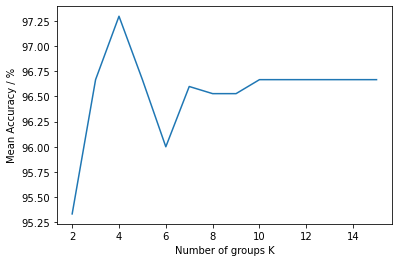

In [77]:
"""
This function shows a graph of the number of groups
K with the mean accuracy %.
Parameters: None
Return value: None
"""
def graph():
    K = [2,3,4,5,6,7,8,9,10,15]
    Accuracy = [95.333,96.667,97.297,96.667,96.000,96.599,96.528,96.528,96.667,96.667]
    plt.plot(K, Accuracy)
    plt.xlabel('Number of groups K') 
    plt.ylabel('Mean Accuracy / %') 
    plt.show()
graph()

To further examine the accuracy of the model, a record of each folds mean values and the mean accuracy percentage for various values of n_ngb (number of neighbors) is kept:

    n_ngb = 1
    Values: [91.8918918918919, 100.0, 97.2972972972973, 94.5945945945946]
    Mean Accuracy: 95.946%

    n_ngb = 2
    Values: [94.5945945945946, 97.2972972972973, 97.2972972972973, 94.5945945945946]
    Mean Accuracy: 95.946%

    n_ngb = 5
    Values: [97.2972972972973, 100.0, 97.2972972972973, 94.5945945945946]
    Mean Accuracy: 97.297%

    n_ngb = 10
    Values: [97.2972972972973, 100.0, 100.0, 94.5945945945946]
    Mean Accuracy: 97.973%

    n_ngb = 20
    Values: [91.8918918918919, 97.2972972972973, 100.0, 94.5945945945946]
    Mean Accuracy: 95.946%

    n_ngb = 30
    Values: [91.8918918918919, 97.2972972972973, 100.0, 91.8918918918919]
    Mean Accuracy: 95.270%

    n_ngb = 40
    Values: [91.8918918918919, 94.5945945945946, 100.0, 91.8918918918919]
    Mean Accuracy: 94.595%

    n_ngb = 50
    Values: [86.48648648648648, 91.8918918918919, 94.5945945945946, 89.1891891891892]
    Mean Accuracy: 90.541%

To visualize our results, I made a graph by displaying number of neighbors against mean accuracy percentages. When examining the graph, we see that the optimal number of neighbors is n_nbg = 10, after which the graph keeps getting a steep, negative slope which indicates that increasing the number of neighbors is now over-fitting the model. Thus, the now over-fitted model is not correctly classifying the data. 

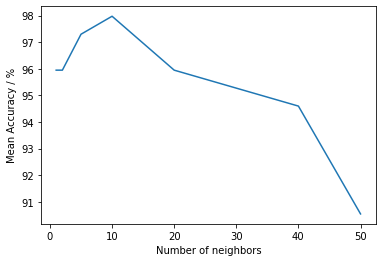

In [78]:
"""
This function shows a graph of the number of neighbors
with the mean accuracy %.
Parameters: None
Return value: None
"""
def graph2():
    n_ngb = [1,2,5,10,20,30,40,50]
    Accuracy = [95.946,95.946,97.297,97.973,95.946,95.270,94.595,90.541]
    plt.plot(n_ngb, Accuracy)
    plt.xlabel('Number of neighbors') 
    plt.ylabel('Mean Accuracy / %') 
    plt.show()
graph2()

So as shown with results above, our model works best with the K value of K = 4 and the n_ngb value of n_ngb = 10. No we know how to train and test our model for new samples without over-fitting or under-fitting the model to our data.

In [42]:
#importing libraries
from math import sqrt
from csv import reader
from random import seed 
import numpy as np 
import matplotlib.pyplot as plt 
from random import randrange